# Ch_04_신경망 학습

앞 장(3장)에서는 신경망의 가중치를 직접 설정해 둔 값으로 구현을 해보았다.

하지만 이번에는 훈련데이터로부터 직접 최적의 결과를 내는 가중치 값을 찾게끔 구현할려고 한다.

이때 최적의 결과라는 걸 설명해줄 손실함수(loss function)이란 것을 정의하는데,

손실함수의 값이 최소가 되도록 가중치값을 조정하도록 할 것이다.

이는 수학에서 최적화 문제에 해당하는데, 최적화 방법중 하나인 gradient method을 소개한다.

4.1 데이터에서 학습한다!

신경망의 특장점 중 하나는 데이터에 맞게 가중치 매개변수(weight parameter)를 학습한다는 점이다.

딥러닝에서는 가중치의 수가 수천, 수만이기 때문에 일일이 수작업으로 지정해주는 건 불가능 하다.

이번 단원에서는 MNIST의 데이터에 따라 학습하는 신경망을 구현해보자.

4.1.1 데이터 주도 학습


기본적으로 기계학습은 데이터로부터 패턴을 발견하고 학습을 함.

이전의 기계학습은 데이터로 부터 특징(feature)을 추출해 내어 그 특증의 패턴을 기계학습 알고리즘으로 학습하는 방법이었다.

예를 들면 숫자 이미지(그림4-1)로부터 feature를 추출하여 svm이나 k-NN 방법으로 학습을 하는 것이다.

하지만 svm이나 k-NN같은 학습을 기계가 하는 부분이라고 하면, 데이터로부터 적절한 feature를 추출하는 것은 사람의 개입하는 정도가 크다.

하지만 신경망이나 딥러닝의 경우에는 사람의 개입이 없는(그래서 end-to-end machine learning이라고 불림) 기계학습 방법이다.

이런 방법의 이점은 어떤 데이터이든지 같은 맥락에서 기계학습이 가능하다.

(이전의 경우에는 숫자데이터에 알맞은 feature, 강아지 사진에 알맞는 feature를 사람이 따로 고안을 했어야 함)

그래서 우리는 현재까진 흠이 없어보이는 이 신경망에 대해서 좀 더 알아보자.

4.1.2 훈련 데이터와 시험 데이터

신경망을 설명하기 앞서 기계학습 데이터 취급시 주의할 점을 보자.

기계학습의 데이터는 training(훈련),test(시험)데이터 2가지로 분류한다.

훈련 데이터로 기계학습을 시켜 최적의 가중치를 찾아낸 다음에, 시험 데이터로 그 모델의 성능(범용 능력이라 함)을 평가하는 것이다.

그러면 왜 이렇게 학습데이터를 분류를 해야하는가?

모델의 궁극적인 목표는 새로운 데이터에 대해 어떤 성능을 발휘하는 가이다.

그런데 학습데이터에만 잘 들어맞는 모델은 실제로 쓸모가 없다. 또 학습데이터에만 지나치게 모델이 잘 들어맞는 것을 overfitting(과적합)이라고 한다.

이 오버피팅을 피하기 위해 학습데이터를 분류하여 모델을 학습시키고 평가한다.

4.2 손실함수

신경망 학습에서 현재의 가중치가 좋은지 안좋은지를 판별하는 지표로 손실 함수(Loss function)을 사용한다.

주로 사용되는 손실함수로는 평균 제곱 오차와 교차 엔트로피 오차가 있다.

손실함수라는 단어에서도 알 수 있듯이 이 함수의 값이 클수록 손실이 큰것이다.

때문에 손실을 최소로 하는 지표를 찾는것이 중요하다.

4.2.1 평균 제곱 오차 Mean Squared Error $\overset{\underset{\mathrm{def}}{}}{=}$ MSE

식 4.1 $ E = \dfrac{1}{2} \sum_{k=1} (y_{k}-t_{k})^2 ~~~$ :MSE 함수

$ y_{k}~$ : 신경망 출력 값, $ t_{k} ~$ : 타겟 값, 정답, $k~$:데이터의 차원

예를 들어보자.

In [1]:
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
t = [0,0,1,0,0,0,0,0,0,0] #cf 한 원소만 1이고 나머진 0인 배열로 나타낸 것을 원-핫 인코딩이라 함

#MSE 함수 정의
import numpy as np

def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2) #보통 ^을 제곱으로 쓰는데 파이썬은 **으로...

mean_squared_error(np.array(y),np.array(t))

0.097500000000000031

위의 예제의 경우 원래 정답은 3인데 모델이 정답을 3을 0.6의 확률로 도출 했을 때의 손실함수 값을 나타낸다.

만약 7일 확률을 0.6으로 도출하는 모델의 손실함수 값을 MSE로 계산해보자


In [2]:
y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]

mean_squared_error(np.array(y),np.array(t))

0.59750000000000003

이 모델은 전 보다 손실함수 값이 높으므로 우리의 손실이 크다고 해석할 수 있다.

그러므로 전의 모델이 더 정확한 모델이라는 판단이 가능하다.

4.2.2 교차 엔트로피 오차 Cross Entropy Error $\overset{\underset{\mathrm{def}}{}}{=}$ CSE

식 4.2 $E= -\sum_{k} {t}_{k} \log {y}_{k}~~~ $  : CSE 함수

$y_{k}, t_{k}$는 MSE때와 같으나 $t_{k}$의 경우에는 원-핫 인코딩의 값이다.

그림 4-3 자연로그 $ y= \log x$의 그래프

$x$가 1에 가까이 갈수록 $y$값은 0에 가까워진다.

때문에 정답에 해당하는 출력 ${y}_{k}$의 값이 커질수록 에러는 점점 작아지고 반대일 경우 에러값이 점점 커지는 형태의 함수이다.

CSE 함수를 구현해보자

In [3]:
#CSE 함수 수현
def cross_entropy_error(y,t):
    delta = 1e-7 #10^-7 인듯.
    return -np.sum(t*np.log(y+delta)) #log(0)은 -inf 라서 그 값을 보정해주기 위한 장치

y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
t = [0,0,1,0,0,0,0,0,0,0]

cross_entropy_error(np.array(y),np.array(t)) #정답에 해당하는 확률이 가장 높을 때

0.51082545709933802

앞에서와 마찬가지로 정답에 해당하는 확률이 낮을 때 즉, 잘못 예측했을 때에는 어떻게 되나 보자.

In [4]:
y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]

cross_entropy_error(np.array(y),np.array(t))

2.3025840929945458

정답을 예측 했을 때보다 함수값이 커진걸 알 수 있다. 그래서 이 함수 값이 크다는 것은 잘못예측했다고 이해할 수 있다.

즉 MSE와 CSE 둘다 loss function으로서의 자격이 적합해 보인다.

4.2.3 미니배치 학습

우리의 목표는 훈련 데이터에 대한 손실함수 값을 구하고, 그 손실함수 값을 최소로 하는 모수(parameter,혹은 매개변수)를 찾는 것이다.

배치라는 것은 앞에서도 설명했듯이 데이터를 몇개의 묶는 것이라고 했는데, 한 배치에 대해 손실함수 값은 어떻게 생각 할 수 있을까.

각 데이터의 손실함수값을 다 더한 값이라고 생가하면 make sense할것 같다.

배치에 대한 CSE를 생각해보자.

식 4.3 $E= -\frac{1}{N} \sum_{n} \sum_{k} {t}_{nk} \log {y}_{nk}~~~ $  : 배치에 대한 손실함수

단순히 하나의 데이터에 대한 4.2 식을 N개로 확장했을 뿐이다. 어렵게 생각하지 말자.

그리고 총 합에다가 N으로 나눔으로써 평균손실함수값을 사용하고 있다.

그 이유는 배치의 갯수에 상관없이 비교를 하기 위해서이다.(평균을 사용하지 않으면 100개의 배치보다 1000개의 배치일때가 에러함수값이 무조건 크다)

일반적으로 모든 데이터에 대해 손실함수 값을 계산하지 않는다. MNIST 데이터만 해도 60,000개 인데 실제 데이터는 수백,수천만개 일때는 효율적이지 못하다.

그에 대한 해결방안으로 일부의 배치에 대해 전체 값을 추정하는 방식을 사용한다.

이때 일부의 배치에 해당하는 겂을 미니배치(mini-batch)라고 한다.

예를 들어 MNIST 6000개의 데이터 중 무작위로 100장을 뽑아 그 100장만 사용하여 학습하는것이라고 생각할 수 있다. 이러한 방법을 미니배치 학습이라 한다.

미니배치를 구현해보자.



In [5]:
import sys, os

sys.path.append(os.pardir) #부모 디렉토리에 있는 파일 사용 가능??

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print("x_train.shpae는 {}\nt_train.shape는 {}". format(x_train.shape,t_train.shape)) 

x_train.shpae는 (60000, 784)
t_train.shape는 (60000, 10)


위의 코드를 살펴보면, load_minist 라는 함수를 통해 MNIST 데이터를 불러왔는데, 훈련데이터와 시험데이터로 나누었고,

각 데이터는 784개의 원소를 가진 배열이고, 정답 레이블은 10개의 원소를 가진 배열인데 정답에 해당하는 원소만 1이고 나머진 0인 배열이다.

이제 이 데이터에서 무작위로 10장을 뽑아보려고 한다. 이런 역할을 하는 함수가 np.random.choice()이다.

In [6]:
train_size = x_train.shape[0]
batch_size = 10

batch_mask = np.random.choice(train_size, batch_size) #train_size 중에 batch_size 갯수 만큼 숫자를 뽑아라.

x_batch = x_train[batch_mask] #위에서 뽑은 수에 해당하는 index의 데이터만 갖고 온다.
t_batch = t_train[batch_mask]


이렇게 뽑아낸 x_batch만을 이용해서 학습을 시키는게 미니배치학습 방법이다.

4.2.4 배치용 교차 엔트로피 오차 구현하기

앞에서 한 개의 데이터에 해당하는 CSE(교차 엔트로피 오차)함수 를 구현했는데, 이번엔 배치에 해당하는 CSE 함수를 구현해보자.

In [7]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/ batch_size


잘 이해가 안된다...

4.2.5 왜 손실함수를 설정하는가?

왜 정확도라는 지표 대신에 손실함수라는 지표를 사용하는 것일까?

우리는 현재의 지표가 좋은지 안좋은지의 판별을 미분을 이용해서 할건데, 이때 정확도를 지표로 사용하게 되면 대부분의 점에서 미분 값이 0이 된다.

가령, 100장의 훈련 데이터를 학습시켰더니 32장을 제대로 인식했다면 정확도는 32%가 된다. 하지만 매개변수를 조정해도 정확도는 32.xx같은 연속적인 값보다는 33%, 35% 등의 불연속적인 값을 띄게 된다. 반대로 손실함수 값은 정의를 보면 모두 연속함수이기 때문에 미분값이 정확도보다는 잘 정의 될수도 있다.즉, 정확도는 매개변수의 작은 변화에 불연속적으로 변하는 반면 손실함수는 연속적으로 변한다.

같은 이유로 신경망에서 활성화 함수로 step function을 잘 이용하지 않는다. 대신 부드러운 시그모이드 함수를 이용한다.

그림 4-4 step 함수와 시그모이드 함수

![title](data/images/fig%204-4.png)

계단 함수는 대부분의 점에서 미분값이 0인 반면, 시그모이드 함수는 어떤 점에서도 미분값이 0이 되지 않으므로 올바르게 학습을 할 수 있다.

4.3 수치 미분

손실함수를 최소화 하는 점을 찾을때 미분을 이용할건데, 그전에 미분을 간단히 복습.

4.3.1 미분

미분이란 한순간의 변화량을 표시한 것이다. 

식 4.4 : 도함수의 정의 $\dfrac{df(x)}{dx} = \lim_{h->0} \dfrac{f(x+h)-f(x)}{h}$

미분은 $x$가 아주 조금 변할때 함수 $f(x)$는 얼마나 변하는지 보여주는 양이라고 생각하면 되겠다.

미분을 구현해보자.



In [8]:
#수치 미분 함수
def numerical_diff(f,x):
    h = 1e-50
    return (f(x+h)-f(x))/h


얼핏보면 잘 정의한것 같지만, 이코드는 두가지의 말썽을 일으킨다. 

첫번째로,

In [9]:
np.float32(1e-50)

0.0

$10^{-50}$ 을 32비트 부동 소수점으로 나타내면 0의 값을 나타내게 된다. 그래서 실제로 이 값으로 뭔가 나누면 컴퓨터가 계산을 못할 가능성이 크다. 그래서 우리는 h=1e-4정도만 하자.

두번째는 위의 함수는 본질적으로 $x+h$와 $x$사이의 기울기이다. 본질적으로 $x$에서의 기울기가 아니다.

![title](data/images/fig 4-5.png)

어쨋든 그 차이를 줄이려면 h에 해당하는 부분을 계속 0으로 보내야하는데, 이부분을 컴퓨터로 다루기가 힘들다.

대신에 이 오차를 줄이기 위해 같은 의미이지만 다른 방법을 쓴다. 

바로,  $\dfrac{df(x)}{dx} = \lim_{h->0} \dfrac{f(x+h)-f(x)}{h} = \lim_{h->0} \dfrac{f(x+h)-f(x-h)}{2h}$ 이다.

두 개선사항을 반영하여 다시 미분함수를 구현해보자.

In [10]:
def numerical_diff(f,x):
    h = 1e-4 #0.0001
    return (f(x+h)-f(x-h))/ (2*h)

4.3.2 수치 미분의 예

다음과 같은 식을 수치미분을 이용하여 계산해보자. 

[식 4.5] $ y=0.01x^2 +0.1x $

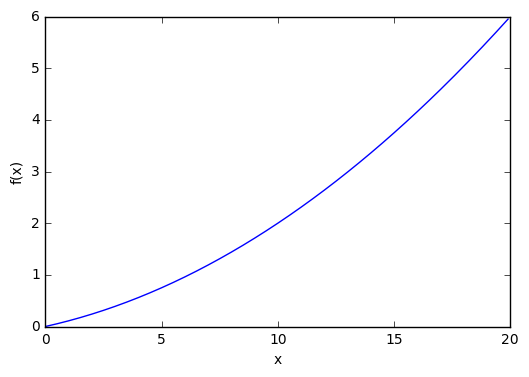

In [11]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

#함수를 그려보자.
import matplotlib.pylab as plt

x = np.arange(0,20,0.1) #0에서 20까지 0.1간격의 배열
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()



In [12]:
# x=5, x=10 일때 미분값
print('x=5에서의 미분값 {}\nx=10에서의 미분값 {}'.format(numerical_diff(function_1,5), numerical_diff(function_1,10)))

x=5에서의 미분값 0.1999999999990898
x=10에서의 미분값 0.2999999999986347


이 값은 수치적 미분 값이고, 원래 $f(x)=0.01x^2 + 0.1x$의 도함수는 $f'(x)=0.02x+0.1$이니까 $f'(5)=0.2,~f'(10)=0.3$ 의 값과 비교해보면 차이가 얼마 나지 않는다.

4.3.3 편미분

지금 까지는 $f:\mathbb{R} -> \mathbb{R}$의 함수였다면, 이제 $f:\mathbb{R}^2 -> \mathbb{R}$의 함수를 생각해보자.

[식 4.6] $~~~~f(x_0,x_1)={x_0}^2+{x_1}^2~~~~$을 구현해보자.

In [13]:
def function_2(x):
    return x[0]**2 + x[1]**2

[그림 4-8] $~~~~f(x_0,x_1)={x_0}^2+{x_1}^2~~~~$ 의 그래프

![title](data/images/fig%204-8.png)

이 함수의 $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$과 $x_1$에 대한 편미분 $\frac{\partial f}{\partial x_1}$ 을 구해보자

In [14]:
function_2(np.array([1,2]))

5

In [15]:
#x_0 = 3, x_1=4 일 때 x_0에 대한 편미분
def function_tmp1(x0):
    return x0*x0+4**2

numerical_diff(function_tmp1,3)

6.00000000000378

In [16]:
#x_0 = 3, x_1 = 4 일 때 x_1에 대한 편미분
def function_tmp2(x1):
    return 3**2+x1*x1

numerical_diff(function_tmp1,4)

7.999999999999119

4.4 기울기

$\mathbb{R}$에서 $\mathbb{R}$로 가는 함수에서의 미분값은 기울기를 의미했다. 그러면 다변수일 경우에는 어떻게 생각할 수 있을까?

$\mathbb{R}^2$에서 $\mathbb{R}$로 가는 함수에서 $(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$ 의 값을 생각해보자. 다변수 함수에서는 이 값이 기울기 벡터(Gradient)가 된다.

In [17]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) #x와 같은 모양의 배열 생성 원소는 0으로 채워짐
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val
    
    return grad


print("식 4.6의 (3,4)에서의 gradient = {}\n식 4.6의 (0,2)에서의 gradient = {}\n식 4.6의 (3,0)에서의 gradient = {}".format(numerical_gradient(function_2, np.array([3.0,4.0])), numerical_gradient(function_2, np.array([0,2.0])),numerical_gradient(function_2,np.array([3.0,0]))))


식 4.6의 (3,4)에서의 gradient = [ 6.  8.]
식 4.6의 (0,2)에서의 gradient = [ 0.  4.]
식 4.6의 (3,0)에서의 gradient = [ 6.  0.]


위의 코드에서 주의할점 하나만 살펴보자.

numerical_gradient(function_2, np.array([3.0,4.0]))에서 np.array([3.0,4.0])대신에 np.array([3,4])를 대입하면 적절한 값이 나오지 않는다.

왜냐하면, x=np.array([3,4])로 정의하면 x는 int형 변수를 가지게 되는데 이 int형 변수는 무조건 버림을 하기 때문에, x[0]-h를 하게되면 

실제 값은 3-0.0001이지만 출력되는 값은 2로 나오기 때문에 에러가 생긴다. 때문에 반드시  np.array([3.0,4.0])을 대입해주어야 한다.

그러면 이 각 점에서 구한 gradient값이 어떤 의미를 가지는지 생각해보자.

[그림 4-9] $~~~~f(x_0,x_1)={x_0}^2+{x_1}^2~~~~$ 의 각 점에서의 gradient에 -를 붙인 값
![](data/images/fig%204-9.png)
$-\nabla f(0,2) = (0,-4)$이 의미하는 바는 (0,2)에서의 함수 $f$가 가장 빨리 감소하는 방향은 (0,-4)방향이라는 뜻이다.

그리고 전체 화살표방향이 (0,0)으로 향하고 있는것을 보아도 $-\nabla$값이 함수의 감소방향을 나타냄을 알 수 있다.

정확히 말하면 gradient가 가리키는 방향은 각 점에서 함수가 가장 크게 감소하는 방향이다.

4.4.1 경사법(경사하강법)

손실함수를 최소화시키는 최적의 매개변수를 찾는게 우리의 목표이다.

하지만 어떤 매개변수가 손실함수를 최소화 하는지 찾는 방법은 쉽지 않다.

이 때 각 점에서의 gradient를 이용하여 손실함수 (혹은 문제에 따라서 목적함수라고도 한다)를 최소화하는 점을 찾는 방법을 경사법(Gradient method)라고 한다.

하지만 복잡한 함수일수록 gradient방향으로 따라간다고 해서 함수의 최소값을 보장해주지는 않는다. 실제로는 거의 최소값을 보장해주지 않는다.

함수가 극소값, 최솟값, saddle point일 때 모두 gradient 값이 0이 되므로 ( gradient가 0이 되는 점을 수학적으로 critical point라고 한다) 기울기가 0인 점이라고 해서 반드시 그점이 최솟값이 된다는 보장을 수학적으로 할 수가 없다. 다만 함수가 convex등의 좋은 조건 속에서라면 가능한 이야기다. 그래서 실제로 gradient method가 극소값에 빠지게 되면 잘 학습이 되지 않는 경우도 있다.

그래서 최솟값이면 아주 좋지만, 적어도 지금 상황보다는 나아지는 방향을 찾는것으로 만족하는 것이다.

[식 4.7] gradient method

$x_0 = x_0 - \eta \frac {\partial f}{\partial x_0}$

$x_1 = x_1 - \eta \frac {\partial f}{\partial x_1}$

$\eta$는 줄어드는 방향으로 얼마나 앞으로 나아갈건지에 해당하는 양이라고 생각해도 되고, 신경망에서 사용하는 용어로는 학습률(Learning Rate)가 되겠다.

[식 4.7]의 방법을 계속 반복하여 gradient 값이 0이거나 혹은 0과 가까울 때 멈추면 된다.

이때 적절한 학습률을 정해야 하는데, 학습률에 따라서 이 방법의 성능이 좌우되기도 한다.

gradient method를 구현해보자.

In [7]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad # x = x-lr*grad의 의미
    return x

인수 f는 최적화 하려는 함수 (수학용어로는 Objective function, 목적함수), init_x는 초기 값(initial value), lr은 learning rate, step_num은 반복횟수를 의미한다.

예제를 보자.

$f(x_0 , x_1)={x_{0}}^2 + {x_{1}}^2 $ 의 최솟값을 구하라

In [8]:
init_x = np.array([-3.0, 4.0]) #시작점이 (-3,4)

gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100) #(0,0)에 가깝게 나와야 정상

array([ -6.11110793e-10,   8.14814391e-10])

위에서 $f(x_0 , x_1)={x_{0}}^2 + {x_{1}}^2 $의 그래프를 봐도 알 수 있듯이, Global minimum은 (0,0)이다.

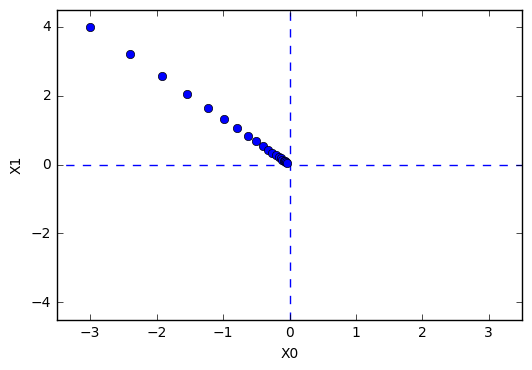

In [9]:
#점의 자취를 확인해보자.
import numpy as np
import matplotlib.pylab as plt
from ch04.gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

이제 학습률에 따른 gradient descent method를 살펴보자.

In [10]:
#학습률이 큰 예 lr=10.0
init_x = np.array([-3.0,4.0])

def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad # x = x-lr*grad의 의미
    return x

gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100) #발산한다.

array([ -2.58983747e+13,  -1.29524862e+12])

In [11]:
#학습률이 낮은 예 lr=1e-10
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100) #초기값과 별 차이가 없다.

array([-2.99999994,  3.99999992])

이처럼 gradient method의 learning late를 hyperparameter(초 매개변수)라고 한다.

신경망에서 가중치와 편향의 값은 신경망이 스스로 학습하면서 최적의 값을 찾는 반면,

learning late같은 변수는 사람이 직접 입력해주어야 하기 때문에 이름을 달리 부르는것 같다.

4.4.2 신경망에서의 기울기

그렇다면 본론으로 돌아와서 신경망에서는 어떤 기울기로 움직여서 목적함수인 손실함수의 값을 최소로 만들어갈것인지 생각해봐야 한다.

이 때 변하는 값은 신경망의 각 가중치이니까 기울기는 신경망 가중치에 대한 손실함수의 값이 자연스럽다.

가중치 행렬을 $\mathbf{W} = \begin{pmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \end{pmatrix}$, 손실함수 $L$라 할 때 $\mathbf{W}$에 대한 $L$의 기울기는 $\frac{\partial L}{\partial \mathbf{W}} = \begin{pmatrix} \frac{\partial L}{\partial w_{11}} &  \frac{\partial L}{\partial w_{12}} \\  \frac{\partial L}{\partial w_{21}} &  \frac{\partial L}{\partial w_{22}} \\  \frac{\partial L}{\partial w_{31}} &  \frac{\partial L}{\partial w_{32}} \end{pmatrix}$ 가 된다 [식4.8]

$L$이 실수로가는 함수이기 때문에 행렬에 대한 미분을 각각 성분별로의 미분으로 생각하면 된다.

그럼 간단히 구현해보자.

In [33]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(3,2) # 정규분포로 초기화, 정규분포에서 뽑은 수로 이루어진 2x3행렬

    def predict(self, x):
        return np.dot(self.W,x)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss       
    
net = simpleNet()
print(net.W) #초기 가중치 매개변수

[[-1.77081736 -0.72651719]
 [-1.23090421  1.27162104]
 [ 0.10364353 -0.59330697]]


In [36]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p) # x에 가중치를 곱해서 모두 더한 값

[-1.71635589  0.4059164  -0.47179015]


In [37]:
t = np.array([0,0,1])
net.loss(x,t) #x값에 가중치 곱함 -> p값 -> 활성화함수에 대입한 값과 정답 레이블과 비교한 교차엔트로피 에러 값

1.3065590204961652

이제 가중치 값을 변화시키면 이 손실함수값이 어떻게 변하는지 확인하기 위해 기울기를 계산해보자.


In [38]:
def f(W):
    return net.loss(x,t)

dw = numerical_gradient(f, net.W) #여기서 net.W는 위에서 선언된 값임.
print(dw)

[[ 0.04679634  0.0701945 ]
 [ 0.3907536   0.58613041]
 [-0.43754994 -0.65632491]]


위의 행렬을 해석할 때, $w_{11}$이 0.5라고 한다면 (위에서 W를 랜덤으로 가져왔기 때문에 시행할때마다 값이 달라진다) $w_{11}$을 $h$만큼 증가시키면 손실함수의 값은 0.5$h$만큼 증가한다는 뜻이다. 그래서 실제 처음 설정된 $W$에 대해 이 행렬이 계산이되면 어떤 값을 조절해야 손실함수 값이 크게 감소할 수 있을지 알 수 있다.

이제 이 gradient로 앞서 했던 gradient method를 똑같이 실행하면 된다.

4.5 학습 알고리즘 구현

지금까지 배운 키워드를 보면 '손실함수','미니배치', '기울기', '경사하강법' 등이 있다. 신경망 학습과정을 간단히 복습해보자.

전제

$~~~$ 신경망에 모수로는 가중치와 편향이 있고, 훈련데이터를 통해 손실함수를 최소화 하도록 가중치와 편향을 조정하는 것을 '학습'이라고 한다.

1단계-미니배치

$~~~$ 훈련 데이터가 많은 경우, 데이터 중 일부를 무작위로 추출한다. 이 추출한 데이터를 미니배치라고 하고 앞으로 이 미니배치에 대해 손실함수 값을 줄일 거다.

2단계-기울기 산출

$~~~$ 손실함수의 값을 줄이기 위해 각 가중치 매개변수에 대한 손실함수 기울기를 계산한다. 이 값은 손실함수를 작게하는 방향을 알려준다.

3단계-매개변수 갱신

$~~~$ 가중치 매개변수를 기울기 방향으로 조금 갱신.

4단계-반복

$~~~$ 적절한 criterion이 만족할때 까지 1~3단계를 반복한다.

이 방법은 미니배치를 결정할 때 랜덤하게 결정되므로 확률적 경사 하강법 (Stochastic Gradient Descent$\overset{\underset{\mathrm{def}}{}}{=}$SGD)라고 한다.

실제 MNIST 데이터셋을 이용해서 구현해보자.

4.5.1 2층 신경망 클래스 구현

우선 2층 신경망을 구현해보자.

In [64]:
#2층 신경망
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    #numerical_gradient가 시간이 굉장히 오래걸릴수 있기 때문에 다음의 오차역전파법 코드를 사용해본다.코드 설명은 나중에 다시.
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

class에 대한 설명은 파이썬 부분에서 살펴보도록 하고, 앞에서 step by step으로 했던 코드들을 모두 한군데에 묶어놓은거라고 생각하면 된다.

TwoLayerNet클래스의 변수에 대해 한번 살펴보자.

params : 신경망의 매개변수를 보관하는 인스턴스 변수 params['W1']은 1번째 층의 가중치이다.

grads :  기울기를 보관하는 변수

TwoLayerNet 클래스의 각 함수를 보자.

__init__ : 초기화를 수행하는 부분이다. 클래스의 인수는 input_size(입력뉴런 수), hidden_size(은닉층의 뉴런수), outputsize(출력중의 뉴련수)

predict(self,x) : 주어진 신경망으로 추론한 예측값

loss(self,x,t) : 예측한값과 주어진 정답레이블을 이용한 손실함수

accuracy(self,x,t) : 정확도 계산

numerical_gradient(self,x,t) : 각 가중치에 대한 기울기

이해가 잘 안되니 예를 들어보자.

TwolayerNet 클래스의 딕셔너리 변수인 params에 잘 정의가 되는지 보자.

In [65]:
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
net.params['W1'].shape #784x100행렬이 나와야 한다.

(784, 100)

In [66]:
x = np.random.rand(100,784) # 784 feature를 가진 100개의 데이터 생각, 즉 배치가 100
y = net.predict(x)
y.shape

(100, 10)

이번엔 grads변수에 기울기가 잘 저장이 되었는지 살펴보자.

In [58]:
###시간이 오래 걸림###
x = np.random.rand(100,784)
t = np.random.rand(100,10)

grads = net.numerical_gradient(x,t)

print("grads['W1'].shape는 {}\ngrads['b1'].shape는 {}\ngrads['W2'].shape는 {}\ngrads['b2'].shape는 {}".format(grads['W1'].shape,grads['b1'].shape,grads['W2'].shape,grads['b2'].shape))

grads['W1'].shape는 (784, 100)
grads['b1'].shape는 (100,)
grads['W2'].shape는 (100, 10)
grads['b2'].shape는 (10,)


In [67]:
#오차역전파법을 사용한 기울기

grads=  net.gradient(x,t)
print("grads['W1'].shape는 {}\ngrads['b1'].shape는 {}\ngrads['W2'].shape는 {}\ngrads['b2'].shape는 {}".format(grads['W1'].shape,grads['b1'].shape,grads['W2'].shape,grads['b2'].shape))


grads['W1'].shape는 (784, 100)
grads['b1'].shape는 (100,)
grads['W2'].shape는 (100, 10)
grads['b2'].shape는 (10,)


4.2.5 미니배치 학습 구현

In [79]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list=[]

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

미니배치는 100개로 설정했다. 즉 60,000개의 데이터 중에서 100개를 임의로 추출하여 그 데이터들에 대해 신경망을 학습했다. 갱신할 때마다 손실함수의 값을 train_loss_list에 저장했다. 즉 train_loss_list에는 각 단계별 손실함수 값이 저장되어있다.

[그림 4-11] 손실함수 값의 추이

![](data/images/fig%204-11.png)

그림에서와 같이 반복횟수가 증가함에 따라 손실함수 값이 줄어든다는 것은 학습이 잘 되고 있다는 뜻이다.

4.5.3 시험 데이터로 평가

그림 4-11에서 처럼 손실함수 값을 줄여주는 최적의 가중치들을 찾았는데, 과연 이 가중치들이 다른 데이터에 대해서도 잘 적용이 될지 확인을 해봐야 한다. 즉 훈련데이터에 오버피팅이 일어난건 아닌지 확인을 해봐야한다.

여기서는 학습 도중 시험데이터를 대상으로 정확도를 기록하도록 할것이다.

